In [7]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
df = pd.read_csv('../results/outputs/encoded_data.csv')

In [5]:
X = df.drop(columns=['AQI_Category'])  
y = df['AQI_Category']   # Split into features and target

#Random Forest 
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

#getting top 10 features
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
top_features = importances.head(10)
print("Top 10 selected features:")
print(top_features)

Top 10 selected features:
PM2.5    0.562921
PM10     0.162202
CO       0.099878
SO2      0.033167
DEWP     0.029916
NO2      0.026661
No       0.012783
PRES     0.011317
O3       0.010753
TEMP     0.009344
dtype: float64


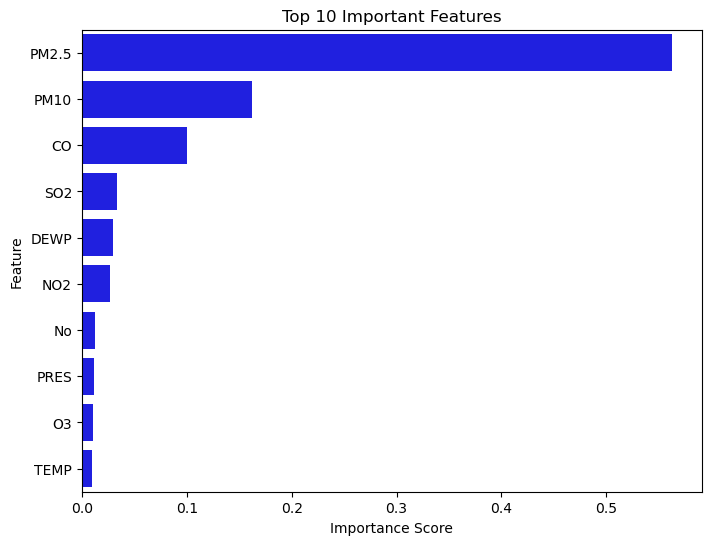

In [9]:
plt.figure(figsize=(8,6))
sns.barplot(x=top_features.values, y=top_features.index, color='blue')
plt.title("Top 10 Important Features")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
os.makedirs('../results/eda_visualizations', exist_ok=True)
plt.savefig('../results/eda_visualizations/feature_importance.png')
plt.show()

In [11]:
#securing important features
X_selected = df[top_features.index]
df_selected = pd.concat([X_selected, y], axis=1)
print("Selected features:")
print(list(top_features.index))

Selected features:
['PM2.5', 'PM10', 'CO', 'SO2', 'DEWP', 'NO2', 'No', 'PRES', 'O3', 'TEMP']


In [12]:
os.makedirs('../results/outputs', exist_ok=True)
df_selected.to_csv('../results/outputs/selected_features.csv', index=False)